# TITLE : MODELS OF DENSITY FROM COMPOSITIONAL DATA MWC7+ PRESSURE TEMP USING MACHINE LEARNING ALGORITHM

OBJECTIVE : TRINING OF MODELS FOR FUTURE SELECTION FOR PREDICTION OF DENSITY USING WIDE RANGE OF COMPOSITION DATA.

THIS FILE PREAPRED SEPRATED FROM TRAINING BECAUSE TO EDIT GRAPH AND DATA TABLE USED FOR PREDICTION NEED TO MANY TIME RE RUN THIS.

TO AVOID TRINING MULTIPAL TIMES THIS IS DONE IN SEPERATED FILES. HOWEVER REVIEWER CAN CROSS VERIFY SAME TRAINED MODELS USED FOR TESTING BY MATCHING HYPER PARAMETER OPTIMIZED DURING TRAINING USED HERE OR NOT. 

ALGORITHM APPLIED : LINEAR REGRESSION, SUPPORT VECTOR MACHINE, KNN, RANDOM FOREST, DECISION TREE, ANN , XGB

In [1]:
#DATA EXTRACTION, MANIPULATION, VIZULIZATION LIBRARY
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#STATISTICAL TOOLS LIBRARY
import scipy.stats as stat
import pylab 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#DATA FETURES OPERATION LIBRARY
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler

#MODELING LIBRARY
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

#MODELLING OF DEEP LEARNING MODEL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner.tuners import RandomSearch


#MODEL EVALUATION LIBRARY
from sklearn.metrics import mean_squared_error , mean_absolute_error, r2_score



#Model saving and loading files
import pickle
from keras.models import load_model


<ipython-input-1-f0bc94e4555e>:33: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [2]:
path = "C:\\STUDY DRIVE\\VISCOSITY PAPER THESIS\\BELOW BUBBLE POINT\\VISCOSITY TREND\\MODEL 3\\DATASOURCE\\"
train_file_name = "TRAIN.xlsx"
test_file_name = "TEST.xlsx"
model_path = "C:\\STUDY DRIVE\\VISCOSITY PAPER THESIS\\BELOW BUBBLE POINT\\VISCOSITY TREND\\MODEL 3\\MODELS\\"
train = pd.read_excel(path+train_file_name)
test = pd.read_excel(path+test_file_name)

export_data_path = "C:\\STUDY DRIVE\\VISCOSITY PAPER THESIS\\BELOW BUBBLE POINT\\VISCOSITY TREND\\MODEL 3\\EXPORTED DATA\\"


figure_path =  "C:\\STUDY DRIVE\\VISCOSITY PAPER THESIS\\BELOW BUBBLE POINT\\VISCOSITY TREND\\MODEL 3\\FIGURES\\"



In [3]:
test.columns

Index(['Ref. Name', 'Tag Name', 'H2S', 'N2', 'CO2', 'C1', 'C2', 'C3', 'C4',
       'C5', 'C6', 'C7+', 'MWC7+', 'Temp', 'P', 'VISCOSITY'],
      dtype='object')

In [4]:
train.columns

Index(['Ref. Name', 'H2S', 'N2', 'CO2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6',
       'C7+', 'MWC7+', 'Temp', 'P', 'VISCOSITY'],
      dtype='object')

In [5]:
X_train = train.drop(["VISCOSITY",'Ref. Name'],axis = 1)
y_train = train.VISCOSITY
X_test = test.drop(["VISCOSITY",'Ref. Name', 'Tag Name'],axis = 1)
y_test = test.VISCOSITY

                              #### Load Models For testing purpose  ####

In [6]:
#All File Name variable
scaler_file = 'scaler.sav'
svr_file    = 'svr_model.sav'
rf_file    = 'rf_model.sav'
xgb_file    = 'xgb_model.sav'


In [7]:
scaler            = pickle.load(open(model_path+scaler_file , "rb"))
svr_regression    = pickle.load(open(model_path+svr_file , "rb"))
rf_regression    = pickle.load(open(model_path+rf_file , "rb"))
xgb_regression    = pickle.load(open(model_path+xgb_file , "rb"))


                              #### First Scale All Inputs with scaler model  ####

In [8]:
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

## 1. SVR MODEL

In [9]:
svr_regression_test_Prediction = svr_regression.predict(x_test)
svr_regression_train_Prediction = svr_regression.predict(x_train)


In [10]:
svr_regression_trainR2 = svr_regression.score(x_train,y_train)
svr_regression_testR2 = svr_regression.score(x_test,y_test)
print(svr_regression_trainR2 , svr_regression_testR2)

0.9819986253309088 0.9080900547493201


In [11]:
result_svr_train = pd.DataFrame()
result_svr_train["Viscosity (train)"] = y_train
result_svr_train["Predicted Viscosity (train)"] = svr_regression_train_Prediction
result_svr_train["Residues"] = abs(result_svr_train["Viscosity (train)"] - result_svr_train["Predicted Viscosity (train)"])
result_svr_train["Absolute Error (%)"] = result_svr_train["Residues"]*100/result_svr_train["Viscosity (train)"]

result_svr_test = pd.DataFrame()
result_svr_test["Viscosity (test)"] = y_test
result_svr_test["Predicted Viscosity (test)"] = svr_regression_test_Prediction
result_svr_test["Residues"] = abs(result_svr_test["Viscosity (test)"] - result_svr_test["Predicted Viscosity (test)"])
result_svr_test["Absolute Error (%)"] = result_svr_test["Residues"]*100/result_svr_test["Viscosity (test)"]




In [12]:
result_svr_train.describe()

,Viscosity (train),Predicted Viscosity (train),Residues,Absolute Error (%)
count,259.000000,259.000000,259.000000,259.000000
mean,0.868979,0.886184,0.079211,19.985122
std,0.664939,0.633980,0.040748,43.092369
min,0.027323,0.120046,0.003813,0.219142
25%,0.399895,0.422889,0.049651,5.949587
50%,0.635088,0.701633,0.099580,10.005227
75%,1.164608,1.169605,0.100110,18.126534
max,3.010000,2.948247,0.394843,365.852275


In [13]:
result_svr_test.describe()

,Viscosity (test),Predicted Viscosity (test),Residues,Absolute Error (%)
count,23.000000,23.000000,23.000000,23.000000
mean,0.926917,1.103981,0.192543,39.840329
std,0.860857,0.825132,0.171331,41.223626
min,0.260429,0.366049,0.023792,0.906344
25%,0.395054,0.570584,0.064057,6.049254
50%,0.488845,0.766200,0.105620,17.754857
75%,0.973735,1.127586,0.309668,74.940487
max,2.939632,2.966275,0.565679,112.343452


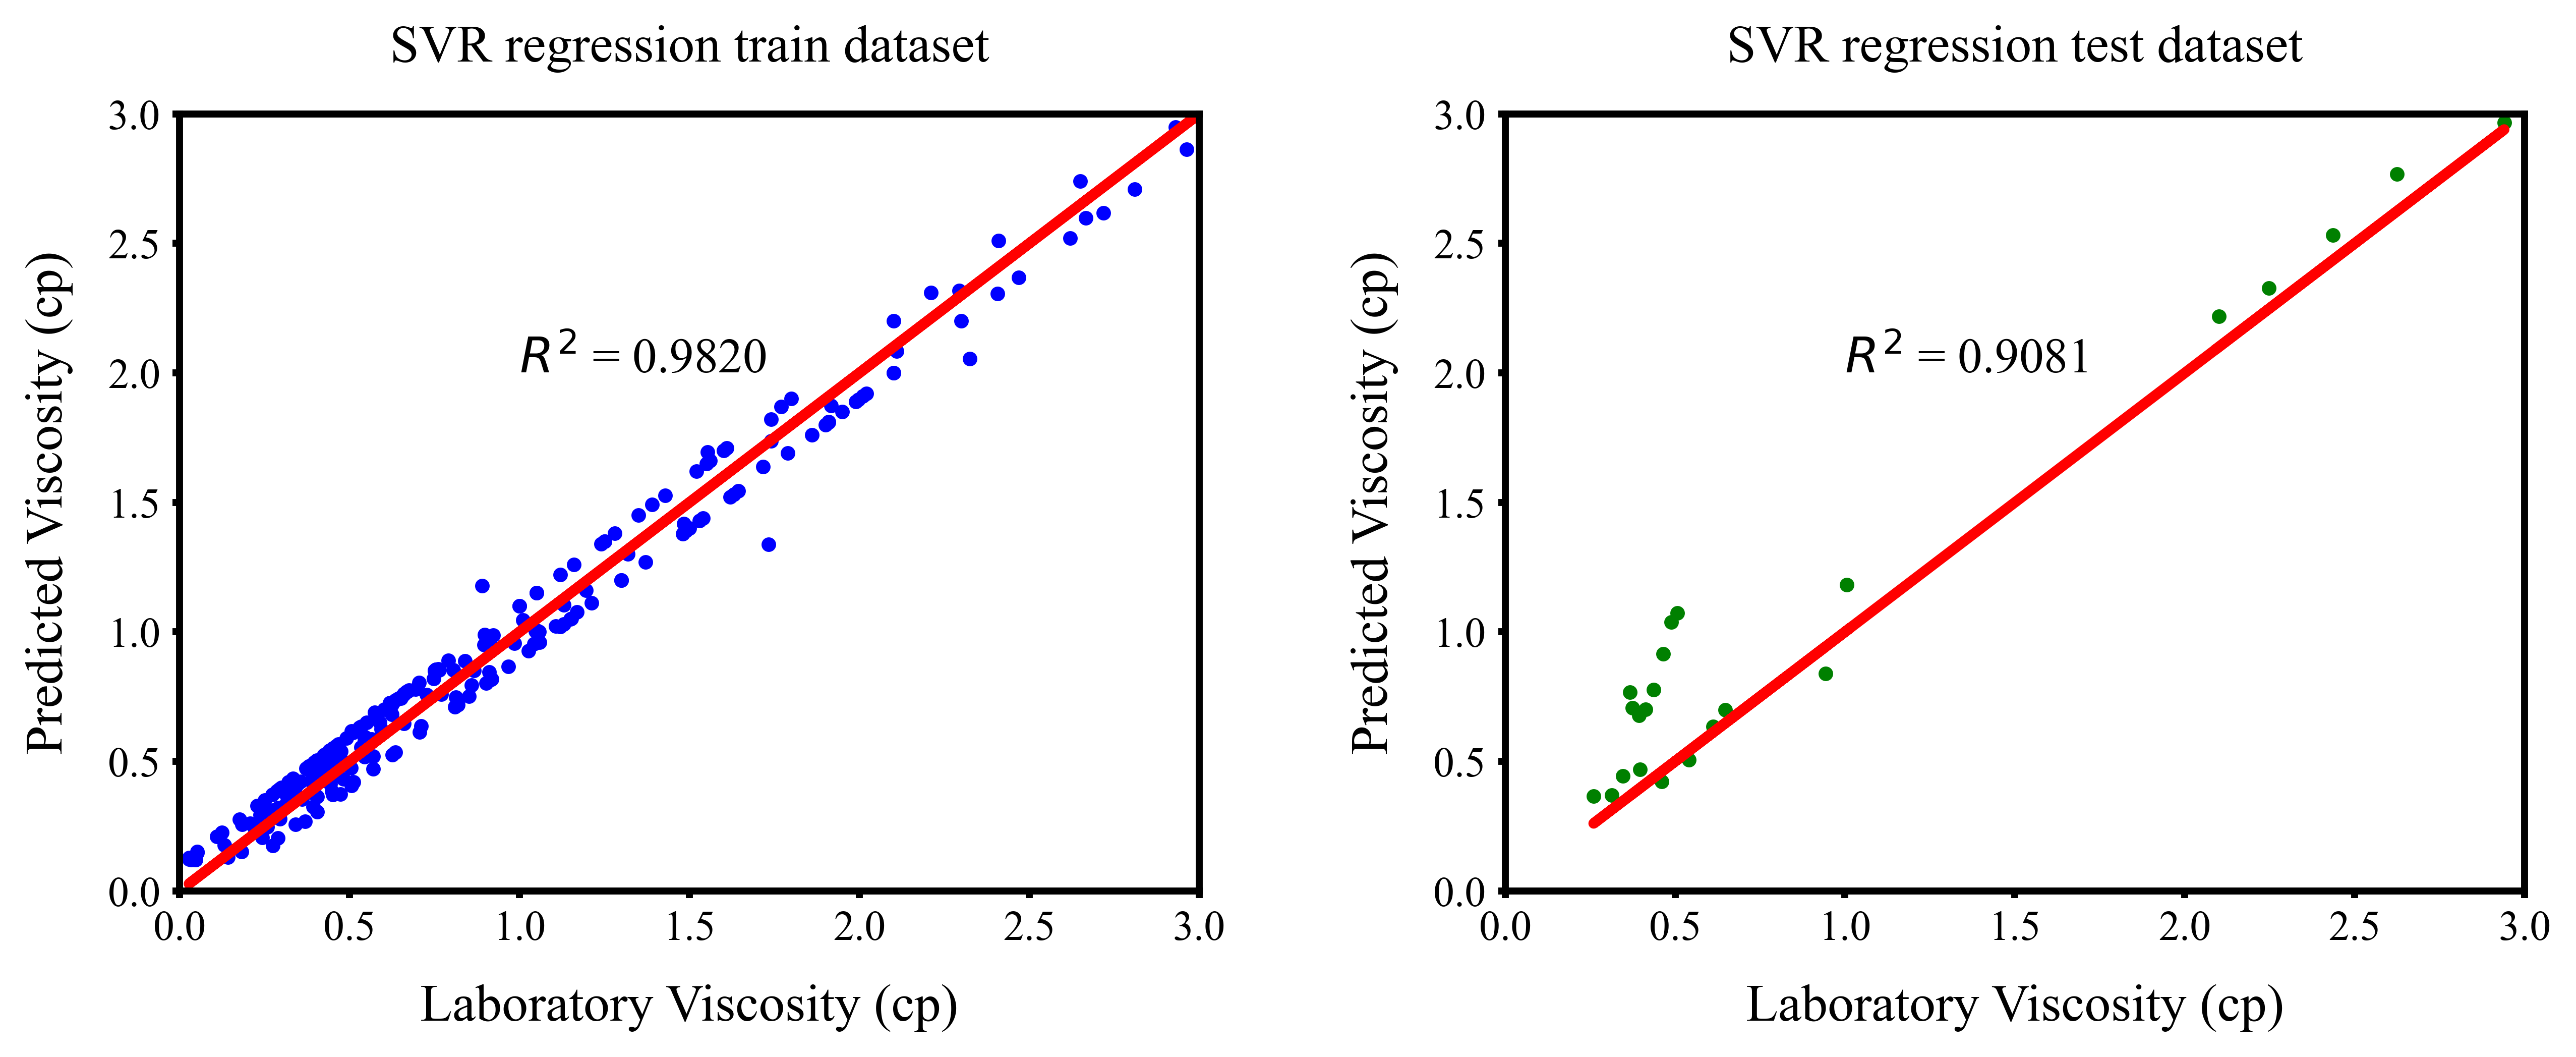

In [14]:
#Make all rc parameter as default 
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"
fig_svr = plt.figure(figsize=(12,4) , dpi = 500)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)


mpl.rcParams['xtick.major.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 2
mpl.rcParams['ytick.major.width'] = 2
ax1 = plt.subplot(121)
plt.scatter(y_train , svr_regression_train_Prediction , c = 'blue'  , s = 10 , label = "$R^2$ = {:.4f}".format(svr_regression_trainR2))
plt.plot(y_train,y_train, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Viscosity (cp)" , fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Viscosity (cp)", fontsize = 15 , labelpad = 10)
plt.title("SVR regression train dataset" , pad = 15 , fontsize = 15)
plt.text(1,2 , "$R^2$ = {:.4f}".format(svr_regression_trainR2) , fontsize = 14)
plt.xlim((0,3))
plt.ylim((0,3))

ax2 = plt.subplot(122)
plt.scatter(y_test , svr_regression_test_Prediction , c = 'green'  , s = 10 , label = "$R^2$ = {:.4f}".format(svr_regression_testR2))
plt.plot(y_test,y_test, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Viscosity (cp)", fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Viscosity (cp)", fontsize = 15 , labelpad = 10)
plt.title("SVR regression test dataset" , pad = 15 , fontsize = 15)
plt.text(1,2, "$R^2$ = {:.4f}".format(svr_regression_testR2) , fontsize = 14)
plt.xlim((0,3))
plt.ylim((0,3))
for i in range(1,3,1):
    for axis in ['top', 'bottom', 'left', 'right']:
        locals()["ax"+str(i)].spines[axis].set_linewidth(2)
        
plt.subplots_adjust(wspace=0.3,hspace=0.3)  

plt.show()
#fig_svr.savefig(figure_path + "Svr Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

In [15]:
svr_MSE_train = mean_squared_error(y_train,svr_regression_train_Prediction)
svr_MAE_train = mean_absolute_error(y_train,svr_regression_train_Prediction)
svr_MSE_test  = mean_squared_error(y_test,svr_regression_test_Prediction)
svr_MAE_test  = mean_absolute_error(y_test,svr_regression_test_Prediction)
print(svr_MSE_train , svr_MAE_train , svr_MSE_test ,  svr_MAE_test )

0.007928476275581567 0.07921143603923511 0.06515074787792506 0.19254310324258353


## 2. RF Model

In [16]:
rf_regression_test_Prediction = rf_regression.predict(x_test)
rf_regression_train_Prediction =rf_regression.predict(x_train)


In [17]:
rf_regression_trainR2 = rf_regression.score(x_train,y_train)
rf_regression_testR2 = rf_regression.score(x_test,y_test)
print(rf_regression_trainR2 , rf_regression_testR2)

0.9514831924938925 0.9503648709999519


In [18]:
result_rf_train = pd.DataFrame()
result_rf_train["Viscosity (train)"] = y_train
result_rf_train["Predicted Viscosity (train)"] = rf_regression_train_Prediction
result_rf_train["Residues"] = abs(result_rf_train["Viscosity (train)"] - result_rf_train["Predicted Viscosity (train)"])
result_rf_train["Absolute Error (%)"] = result_rf_train["Residues"]*100/result_rf_train["Viscosity (train)"]

result_rf_test = pd.DataFrame()
result_rf_test["Viscosity (test)"] = y_test
result_rf_test["Predicted Viscosity (test)"] = rf_regression_test_Prediction
result_rf_test["Residues"] = abs(result_rf_test["Viscosity (test)"] - result_rf_test["Predicted Viscosity (test)"])
result_rf_test["Absolute Error (%)"] = result_rf_test["Residues"]*100/result_rf_test["Viscosity (test)"]




In [19]:
result_rf_train.describe()

,Viscosity (train),Predicted Viscosity (train),Residues,Absolute Error (%)
count,259.000000,259.000000,259.000000,259.000000
mean,0.868979,0.865266,0.077915,11.746321
std,0.664939,0.604197,0.123924,31.799958
min,0.027323,0.034912,0.000078,0.009279
25%,0.399895,0.406742,0.009679,1.924346
50%,0.635088,0.670002,0.031774,4.948703
75%,1.164608,1.203524,0.088590,10.475649
max,3.010000,2.779408,0.846806,360.233378


In [20]:
result_rf_test.describe()

,Viscosity (test),Predicted Viscosity (test),Residues,Absolute Error (%)
count,23.000000,23.000000,23.000000,23.000000
mean,0.926917,1.061085,0.157363,31.170736
std,0.860857,0.787965,0.104378,26.433151
min,0.260429,0.340808,0.011484,0.511151
25%,0.395054,0.625879,0.076742,7.648985
50%,0.488845,0.726227,0.149760,19.789835
75%,0.973735,1.003532,0.238764,55.216497
max,2.939632,2.766776,0.372535,76.207200


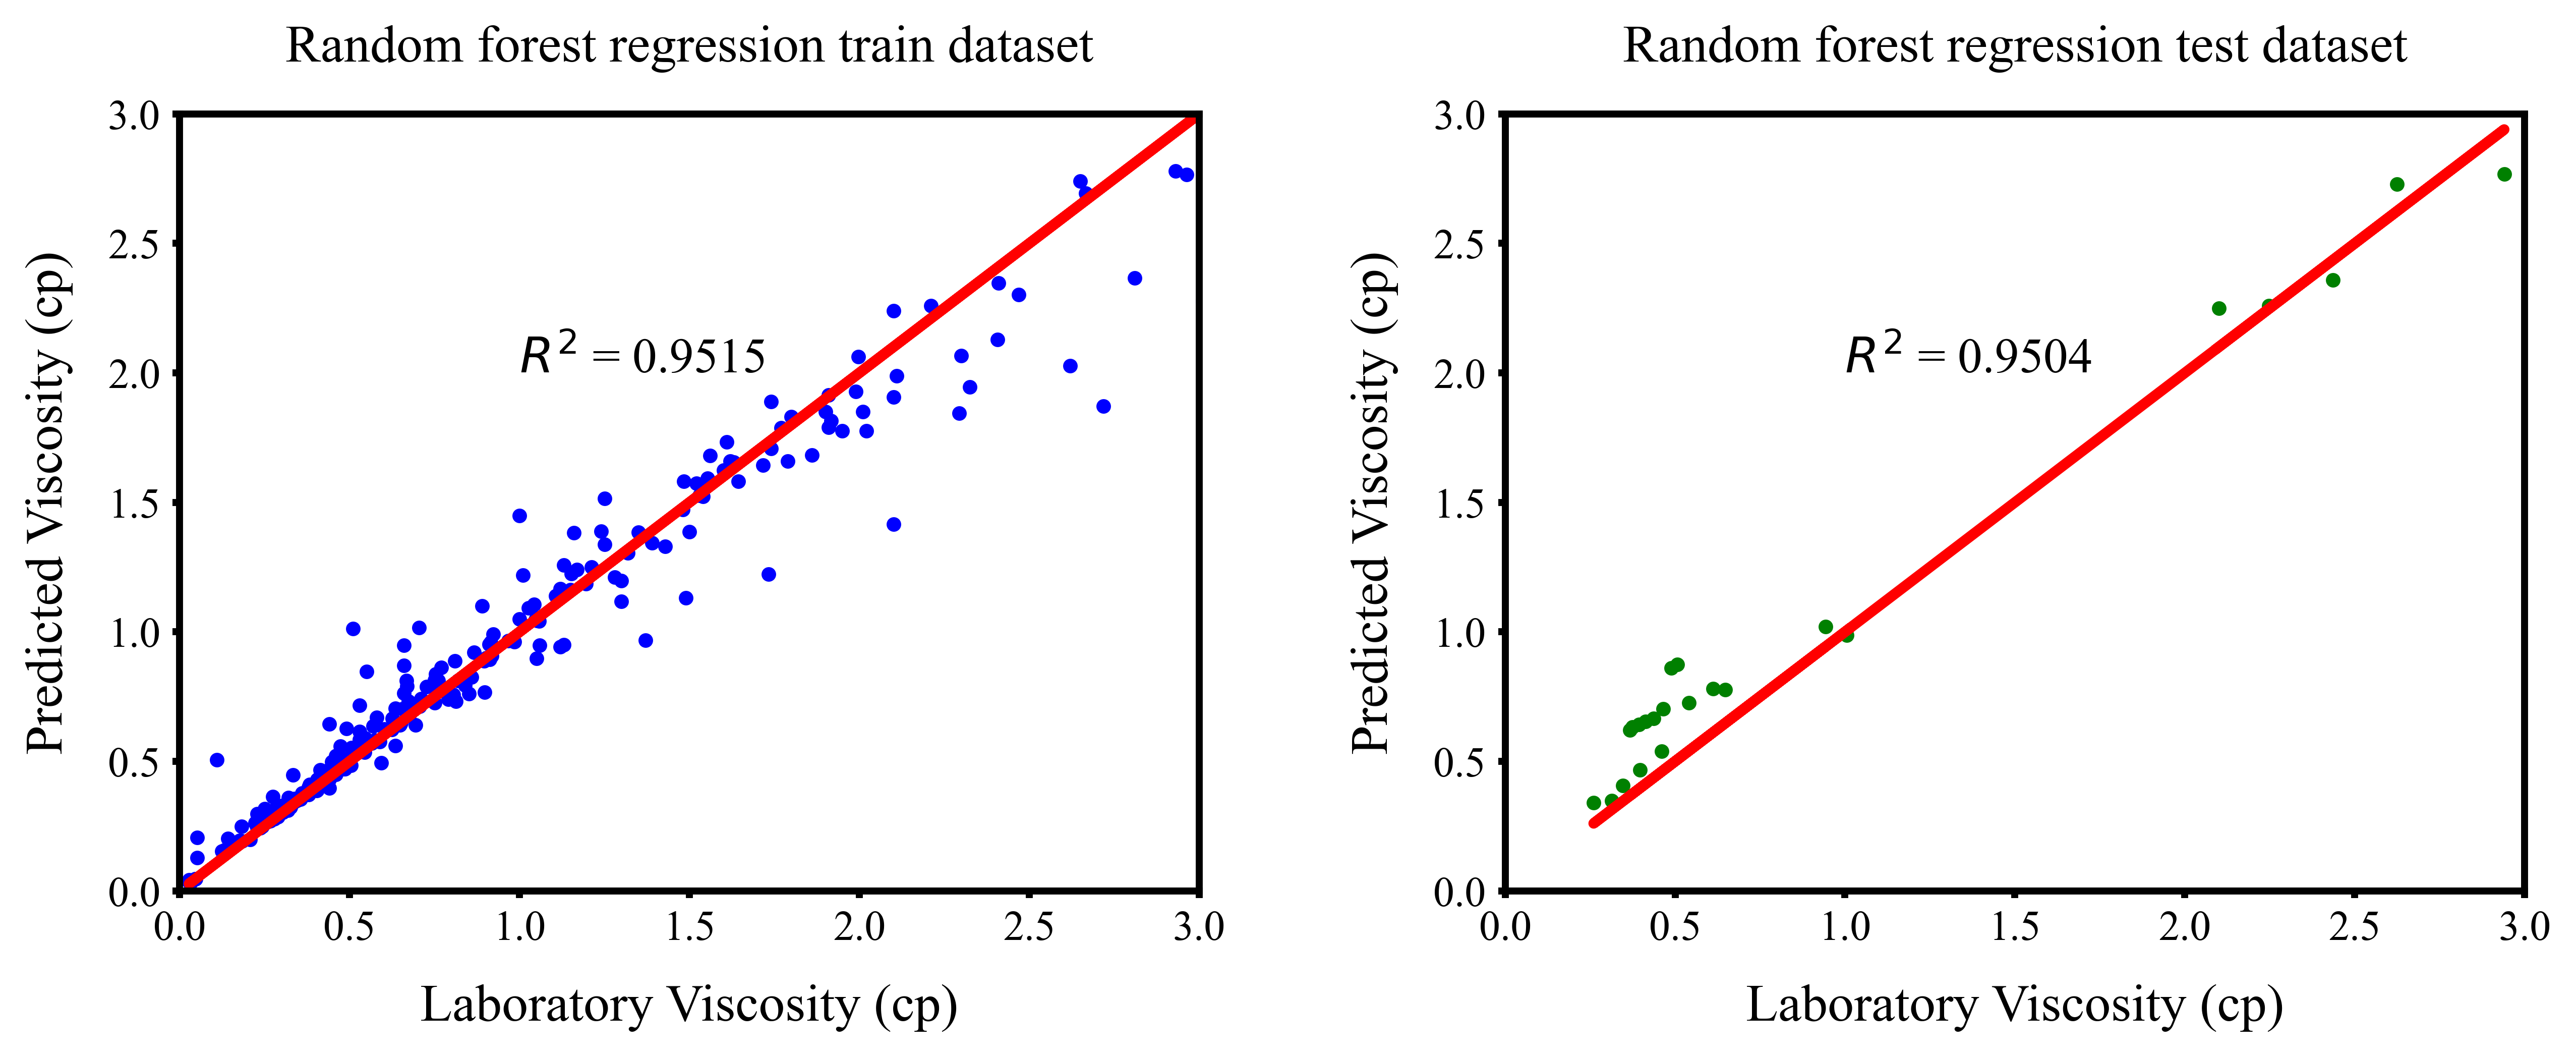

In [21]:
#Make all rc parameter as default 
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"
fig_rf = plt.figure(figsize=(12,4) , dpi = 500)

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

mpl.rcParams['xtick.major.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 2
mpl.rcParams['ytick.major.width'] = 2

ax1 = plt.subplot(121)
plt.scatter(y_train , rf_regression_train_Prediction , c = 'blue'  , s = 10 , label = "$R^2$ = {:.4f}".format(rf_regression_trainR2))
plt.plot(y_train,y_train, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Viscosity (cp)" , fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Viscosity (cp)", fontsize = 15 , labelpad = 10)
plt.title("Random forest regression train dataset" , pad = 15 , fontsize = 15)
plt.text( 1,2 , "$R^2$ = {:.4f}".format(rf_regression_trainR2) , fontsize = 14)
plt.xlim((0,3))
plt.ylim((0,3))


ax2 = plt.subplot(122)
plt.scatter(y_test , rf_regression_test_Prediction , c = 'green'  , s = 10 , label = "$R^2$ = {:.4f}".format(rf_regression_testR2))
plt.plot(y_test,y_test, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Viscosity (cp)", fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Viscosity (cp)", fontsize = 15 , labelpad = 10)
plt.title("Random forest regression test dataset" , pad = 15 , fontsize = 15)
plt.text( 1,2 , "$R^2$ = {:.4f}".format(rf_regression_testR2) , fontsize = 14)
plt.xlim((0,3))
plt.ylim((0,3))

for i in range(1,3,1):
    for axis in ['top', 'bottom', 'left', 'right']:
        locals()["ax"+str(i)].spines[axis].set_linewidth(2)
        
plt.subplots_adjust(wspace=0.3,hspace=0.3)  
plt.show()
#fig_rf.savefig(figure_path + "RF Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

In [22]:
rf_MSE_train = mean_squared_error(y_train,rf_regression_train_Prediction)
rf_MAE_train = mean_absolute_error(y_train,rf_regression_train_Prediction)
rf_MSE_test  = mean_squared_error(y_test,rf_regression_test_Prediction)
rf_MAE_test  = mean_absolute_error(y_test,rf_regression_test_Prediction)
print(rf_MSE_train , rf_MAE_train , rf_MSE_test , rf_MAE_test )

0.021368610139513945 0.07791540131249097 0.03518406812832366 0.1573627229126125


## 3. XGB Model

In [23]:
xgb_regression_test_Prediction = xgb_regression.predict(x_test)
xgb_regression_train_Prediction = xgb_regression.predict(x_train)


In [24]:
from sklearn.metrics import r2_score
xgb_regression_trainR2 = r2_score(y_train , xgb_regression_train_Prediction)
xgb_regression_testR2 = r2_score(y_test , xgb_regression_test_Prediction)
print(xgb_regression_trainR2 , xgb_regression_testR2)

0.924280338784211 0.938183270751491


In [25]:
result_xgb_train = pd.DataFrame()
result_xgb_train["Viscosity (train)"] = y_train
result_xgb_train["Predicted Viscosity (train)"] = xgb_regression_train_Prediction
result_xgb_train["Residues"] = abs(result_xgb_train["Viscosity (train)"] - result_xgb_train["Predicted Viscosity (train)"])
result_xgb_train["Absolute Error (%)"] = result_xgb_train["Residues"]*100/result_xgb_train["Viscosity (train)"]

result_xgb_test = pd.DataFrame()
result_xgb_test["Viscosity (test)"] = y_test
result_xgb_test["Predicted Viscosity (test)"] = xgb_regression_test_Prediction
result_xgb_test["Residues"] = abs(result_xgb_test["Viscosity (test)"] - result_xgb_test["Predicted Viscosity (test)"])
result_xgb_test["Absolute Error (%)"] = result_xgb_test["Residues"]*100/result_xgb_test["Viscosity (test)"]




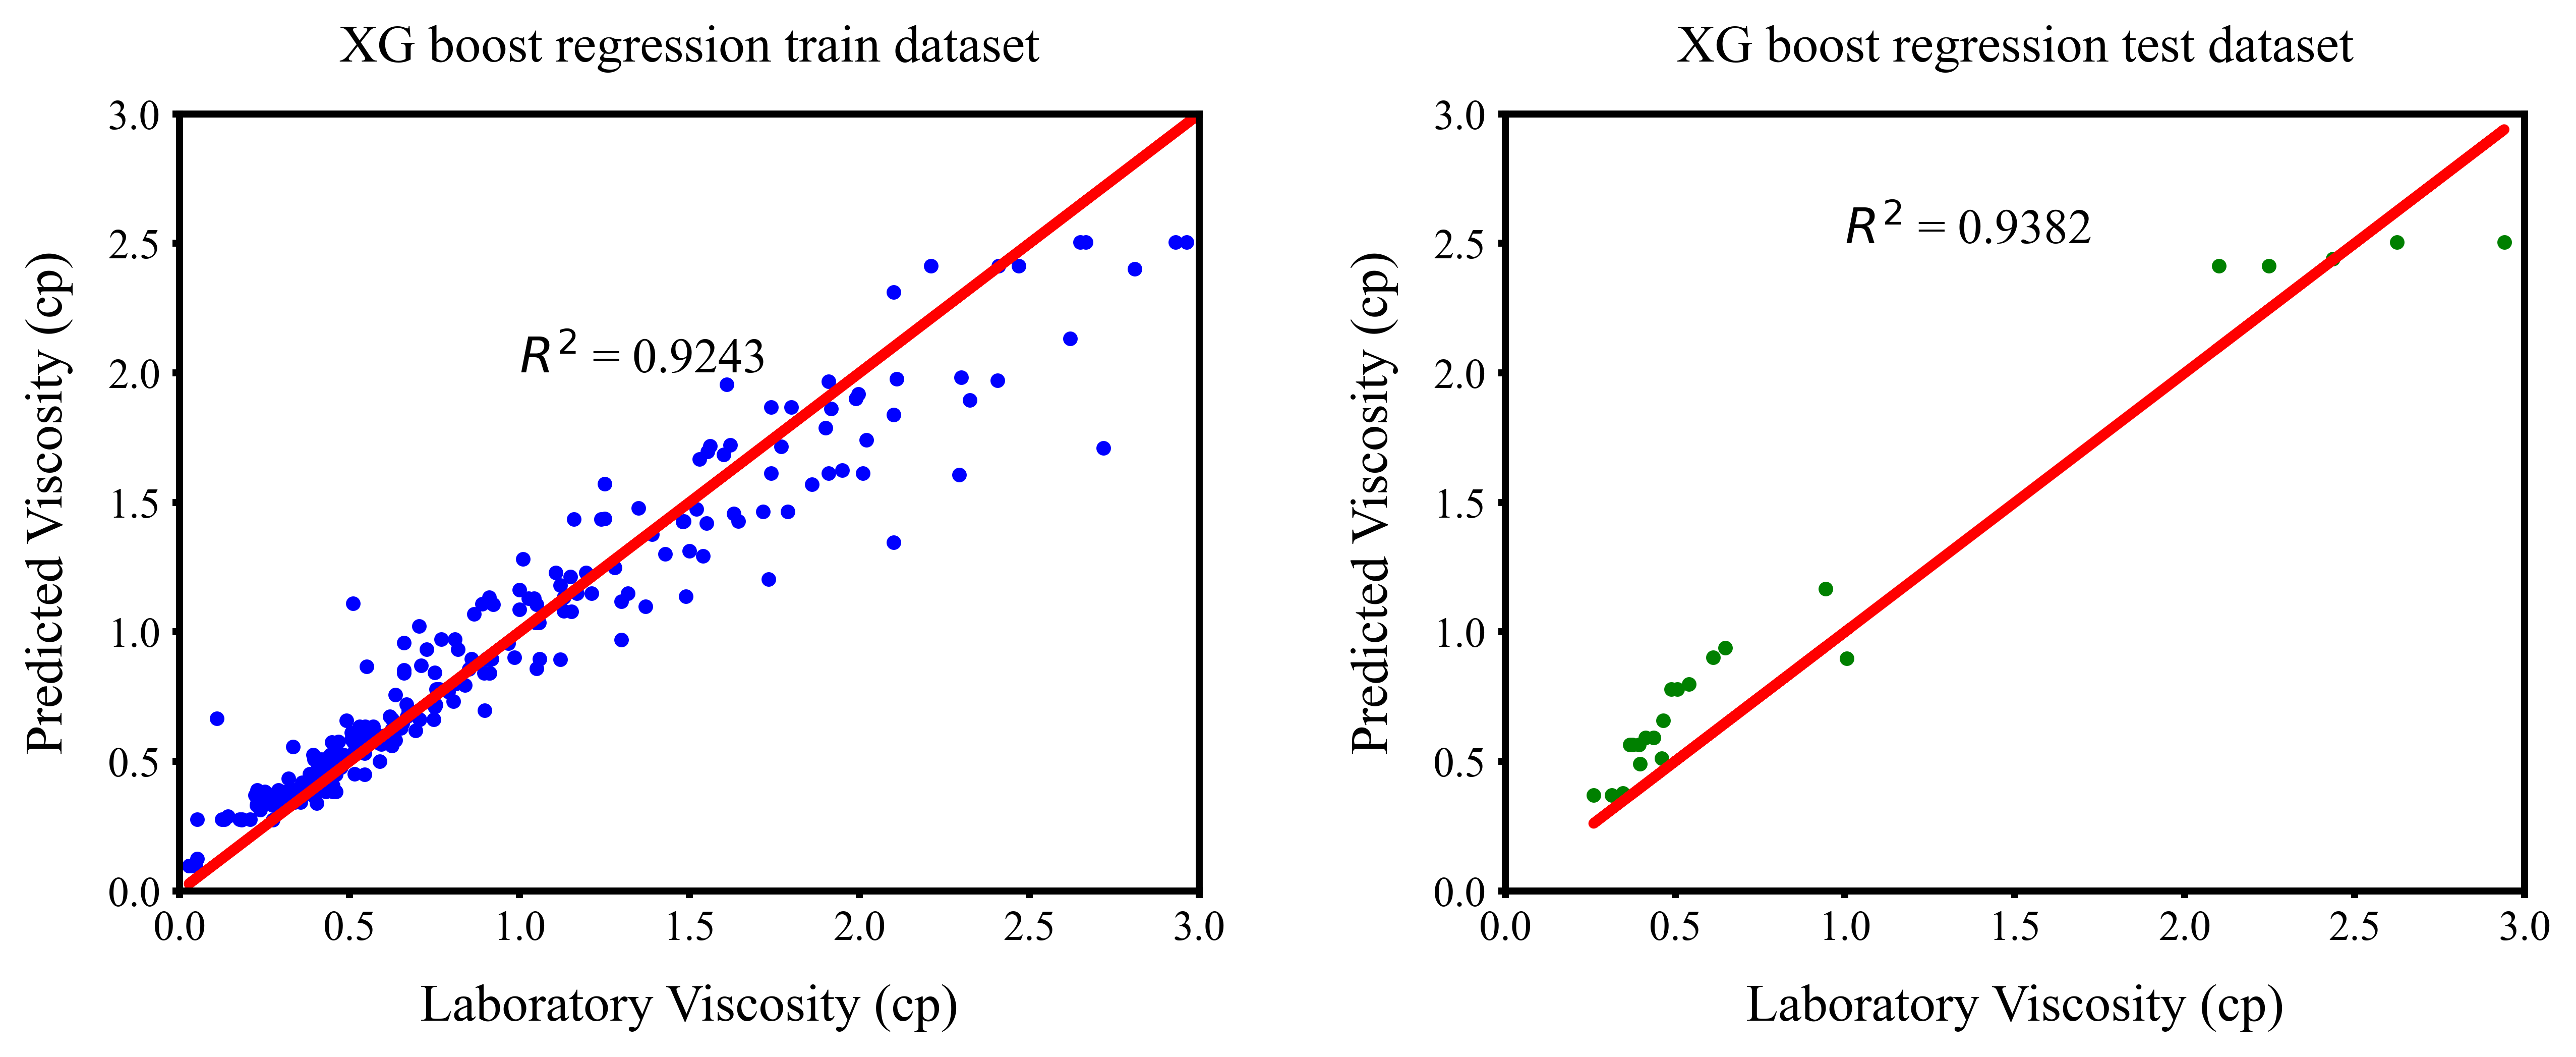

In [26]:
#Make all rc parameter as default 
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"


fig_xgb= plt.figure(figsize=(12,4) , dpi = 500)

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

mpl.rcParams['xtick.major.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 2
mpl.rcParams['ytick.major.width'] = 2

ax1 = plt.subplot(121)
plt.scatter(y_train , xgb_regression_train_Prediction , c = 'blue'  , s = 10 , label = "$R^2$ = {:.4f}".format(xgb_regression_trainR2))
plt.plot(y_train,y_train, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Viscosity (cp)" , fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Viscosity (cp)", fontsize = 15 , labelpad = 10)
plt.title("XG boost regression train dataset" , pad = 15 , fontsize = 15)
plt.text( 1,2 , "$R^2$ = {:.4f}".format(xgb_regression_trainR2) , fontsize = 14)
plt.xlim((0,3))
plt.ylim((0,3))


ax2 = plt.subplot(122)
plt.scatter(y_test , xgb_regression_test_Prediction , c = 'green'  , s = 10 , label = "$R^2$ = {:.4f}".format(xgb_regression_testR2))
plt.plot(y_test,y_test, linewidth = 3 , c = 'red')
plt.xlabel("Laboratory Viscosity (cp)", fontsize = 15 , labelpad = 10)
plt.ylabel("Predicted Viscosity (cp)", fontsize = 15 , labelpad = 10)
plt.title("XG boost regression test dataset" , pad = 15 , fontsize = 15)
plt.text( 1,2.5, "$R^2$ = {:.4f}".format(xgb_regression_testR2) , fontsize = 14)
plt.xlim((0,3))
plt.ylim((0,3))

for i in range(1,3,1):
    for axis in ['top', 'bottom', 'left', 'right']:
        locals()["ax"+str(i)].spines[axis].set_linewidth(2)
        
plt.subplots_adjust(wspace=0.3,hspace=0.3)  
plt.show()
#fig_xgb.savefig(figure_path + "XGB Result.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")

In [27]:
xgb_MSE_train = mean_squared_error(y_train,xgb_regression_train_Prediction)
xgb_MAE_train = mean_absolute_error(y_train,xgb_regression_train_Prediction)
xgb_MSE_test  = mean_squared_error(y_test,xgb_regression_test_Prediction)
xgb_MAE_test  = mean_absolute_error(y_test,xgb_regression_test_Prediction)
print(xgb_MSE_train , xgb_MAE_train , xgb_MSE_test , xgb_MAE_test )

0.03334976070328992 0.11907104421057511 0.04381904625144769 0.18234073688049132


In [28]:
result_xgb_train.describe()

,Viscosity (train),Predicted Viscosity (train),Residues,Absolute Error (%)
count,259.000000,259.000000,259.000000,259.000000
mean,0.868979,0.868979,0.119071,24.072107
std,0.664939,0.572043,0.138731,51.821052
min,0.027323,0.097457,0.000608,0.097461
25%,0.399895,0.418720,0.036253,5.253290
50%,0.635088,0.661483,0.071256,12.444376
75%,1.164608,1.148938,0.146876,22.278470
max,3.010000,2.505283,1.007177,504.644309


In [29]:
result_xgb_test.describe()

,Viscosity (test),Predicted Viscosity (test),Residues,Absolute Error (%)
count,23.000000,23.000000,23.000000,23.000000
mean,0.926917,1.051719,0.182341,30.430203
std,0.860857,0.781446,0.105126,18.794014
min,0.260429,0.369364,0.004329,0.177712
25%,0.395054,0.564319,0.108451,12.928805
50%,0.488845,0.778479,0.178155,35.293413
75%,0.973735,1.052499,0.264281,46.127723
max,2.939632,2.505283,0.434349,59.248678


In [30]:
model_comp_test = pd.DataFrame({
    'Model Name' : [ 'SVM'  , 'RF' ,"XGB"],
    'R Square' : [svr_regression_testR2 ,rf_regression_testR2,xgb_regression_testR2],
    'MSE' : [svr_MSE_test,rf_MSE_test,xgb_MSE_test],
    'MAE' : [svr_MAE_test ,rf_MAE_test,xgb_MAE_test],
    '%AAD' : [result_svr_test.describe()["Absolute Error (%)"].loc["mean"],
              result_rf_test.describe()["Absolute Error (%)"].loc["mean"],
             
              result_xgb_test.describe()["Absolute Error (%)"].loc["mean"]
             ]

})

In [31]:
model_comp_test

,Model Name,R Square,MSE,MAE,%AAD
0,SVM,0.908090,0.065151,0.192543,39.840329
1,RF,0.950365,0.035184,0.157363,31.170736
2,XGB,0.938183,0.043819,0.182341,30.430203


In [32]:
model_comp_train = pd.DataFrame({
    'Model Name' : ['SVM' ,'RF',"XGB"],
    'R Square' : [svr_regression_trainR2 ,rf_regression_trainR2,xgb_regression_trainR2],
    'MSE' : [svr_MSE_train , rf_MSE_train,xgb_MSE_train],
    'MAE' : [svr_MAE_train ,rf_MAE_train,xgb_MSE_train],
    '%AAD' : [result_svr_train.describe()["Absolute Error (%)"].loc["mean"],
              result_rf_train.describe()["Absolute Error (%)"].loc["mean"],
             result_xgb_train.describe()["Absolute Error (%)"].loc["mean"]]
})

In [33]:
model_comp_train

,Model Name,R Square,MSE,MAE,%AAD
0,SVM,0.981999,0.007928,0.079211,19.985122
1,RF,0.951483,0.021369,0.077915,11.746321
2,XGB,0.924280,0.033350,0.033350,24.072107


In [34]:
## Final File For prediction values and graph visualization for each crude for each model

## 1. Visulization of Result with SVR

In [35]:
test.columns

Index(['Ref. Name', 'Tag Name', 'H2S', 'N2', 'CO2', 'C1', 'C2', 'C3', 'C4',
       'C5', 'C6', 'C7+', 'MWC7+', 'Temp', 'P', 'VISCOSITY'],
      dtype='object')

In [36]:
svr_test_result = test[["P","VISCOSITY","Tag Name","Temp"]]
svr_test_result["Viscosity Predicted"] = result_svr_test["Predicted Viscosity (test)"]

<ipython-input-36-85b46948d469>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  svr_test_result["Viscosity Predicted"] = result_svr_test["Predicted Viscosity (test)"]


In [37]:
svr_test_result.head()

,P,VISCOSITY,Tag Name,Temp,Viscosity Predicted
0,0.740729,1.004781,CRUDE 1,399.85,1.182721
1,7.407396,0.506773,CRUDE 1,399.85,1.072452
2,9.629618,0.488845,CRUDE 1,399.85,1.038029
3,18.518507,0.464940,CRUDE 1,399.85,0.914169
4,31.851841,0.437052,CRUDE 1,399.85,0.775853


In [38]:
Ref_name_list = svr_test_result["Tag Name"].unique()

In [39]:
Ref_name_list

array(['CRUDE 1', 'CRUDE 2', 'CRUDE 3'], dtype=object)

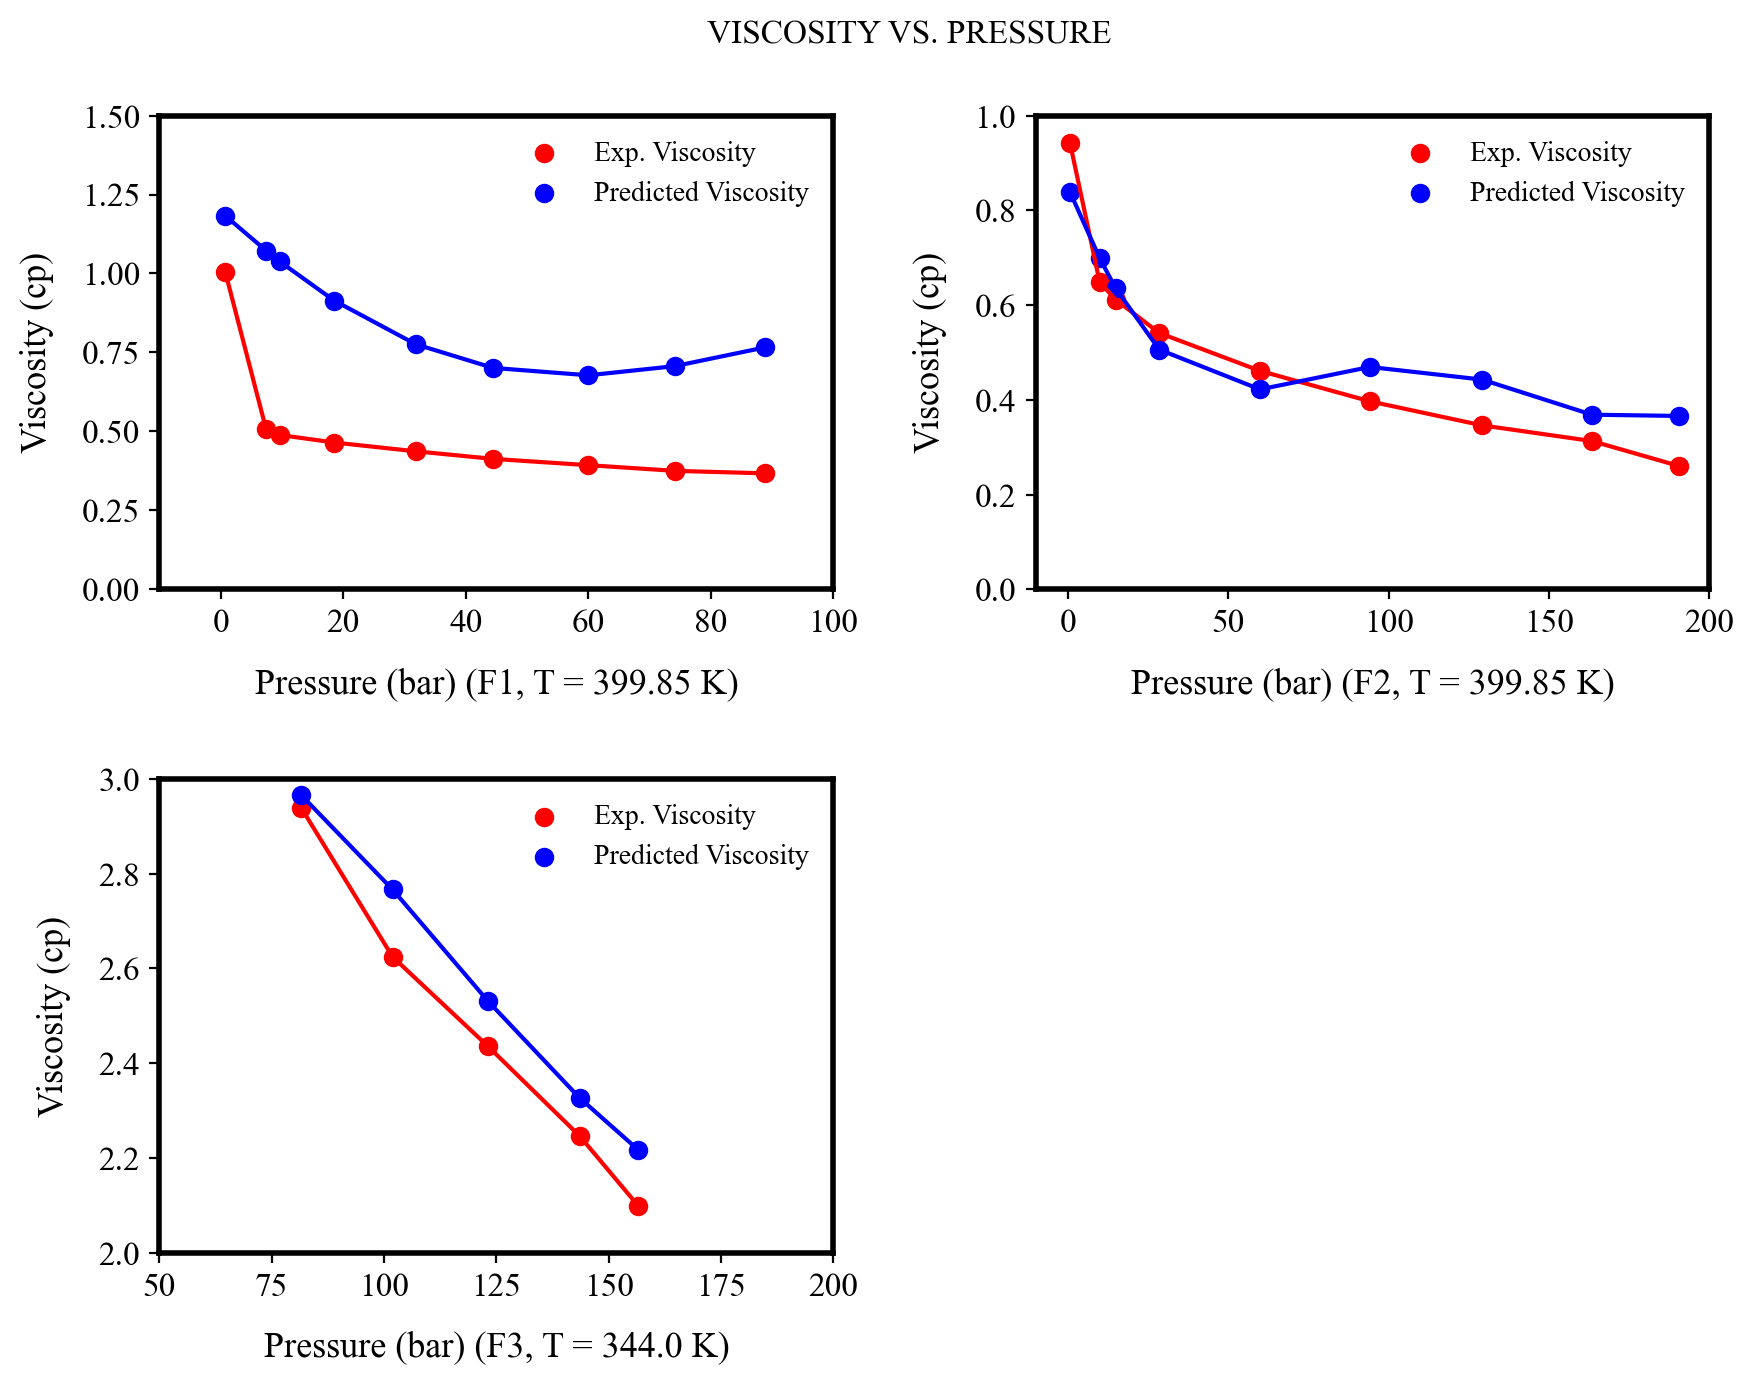

<ipython-input-50-ec02cb7ff3e2>:56: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig1.savefig(figure_path + "svrJubert.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-50-ec02cb7ff3e2>:56: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig1.savefig(figure_path + "svrJubert.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


In [50]:
#Make all rc parameter as default 
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
fig1 = plt.figure(figsize=(10,16) , dpi = 200)
plt.suptitle("VISCOSITY VS. PRESSURE" , fontsize = 12 , c = "black", y=0.91)

for i,j in enumerate(Ref_name_list , 1):
    locals()["ax"+str(i)] = plt.subplot(4,2,i)
    plt.scatter(svr_test_result[svr_test_result["Tag Name"] == j]["P"],svr_test_result[svr_test_result["Tag Name"] == j]["VISCOSITY"],c = "red",label = "Exp. Viscosity")
    plt.plot(svr_test_result[svr_test_result["Tag Name"] == j]["P"],svr_test_result[svr_test_result["Tag Name"] == j]["VISCOSITY"],c = "red")
    plt.scatter(svr_test_result[svr_test_result["Tag Name"] == j]["P"],svr_test_result[svr_test_result["Tag Name"] == j]["Viscosity Predicted"],c = "blue",label = "Predicted Viscosity")
    plt.plot(svr_test_result[svr_test_result["Tag Name"] == j]["P"],svr_test_result[svr_test_result["Tag Name"] == j]["Viscosity Predicted"],c = "blue")
    plt.legend(fontsize = 8)
  
    #plt.ylim((round(min(svr_test_result[svr_test_result["Ref. Name"] == j]["Density Predicted"])-50), round(max(svr_test_result[svr_test_result["Ref. Name"] == j]["Density"])+50)))
    #plt.yticks((min(svr_test_result[svr_test_result["Ref. Name"] == j]["Density Predicted"])-50, max(svr_test_result[svr_test_result["Ref. Name"] == j]["Density"])+50))
    #plt.xlim((min(svr_test_result[svr_test_result["Ref. Name"] == j]["P"])-5, max(svr_test_result[svr_test_result["Ref. Name"] == j]["P"])+5))

    plt.xlabel("Pressure (bar)" + " " + "(F" + str(i)+"," +" " + "T = " + str(svr_test_result[svr_test_result["Tag Name"] == j][["Temp"]].values[0][0]) + " K)", fontsize = 13,labelpad = 10)
    plt.ylabel("Viscosity (cp)",fontsize = 13,labelpad = 10)
    plt.legend(frameon=False )
    
#Changing Border thickness of all subplots
for i in range(1,4,1):
    for axis in ['top', 'bottom', 'left', 'right']:
        locals()["ax"+str(i)].spines[axis].set_linewidth(2)

ax1.set_xlim(-10,100)


ax2.set_xlim(-10,200)
ax3.set_xlim(50,200)






##Set y limit for axis ##

ax1.set_ylim(0,1.5)


ax2.set_ylim(0,1)

ax3.set_ylim(2,3)





plt.subplots_adjust(wspace=0.3,hspace = 0.4)  
plt.show()
fig1.savefig(figure_path + "svrJubert.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


## 2. Visulization of Result with RF

In [41]:
rf_test_result = test[["P","VISCOSITY","Tag Name","Temp"]]
rf_test_result["Viscosity Predicted"] = result_rf_test["Predicted Viscosity (test)"]

<ipython-input-41-0436349d4116>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rf_test_result["Viscosity Predicted"] = result_rf_test["Predicted Viscosity (test)"]


In [42]:
Ref_name_list = rf_test_result["Tag Name"].unique()

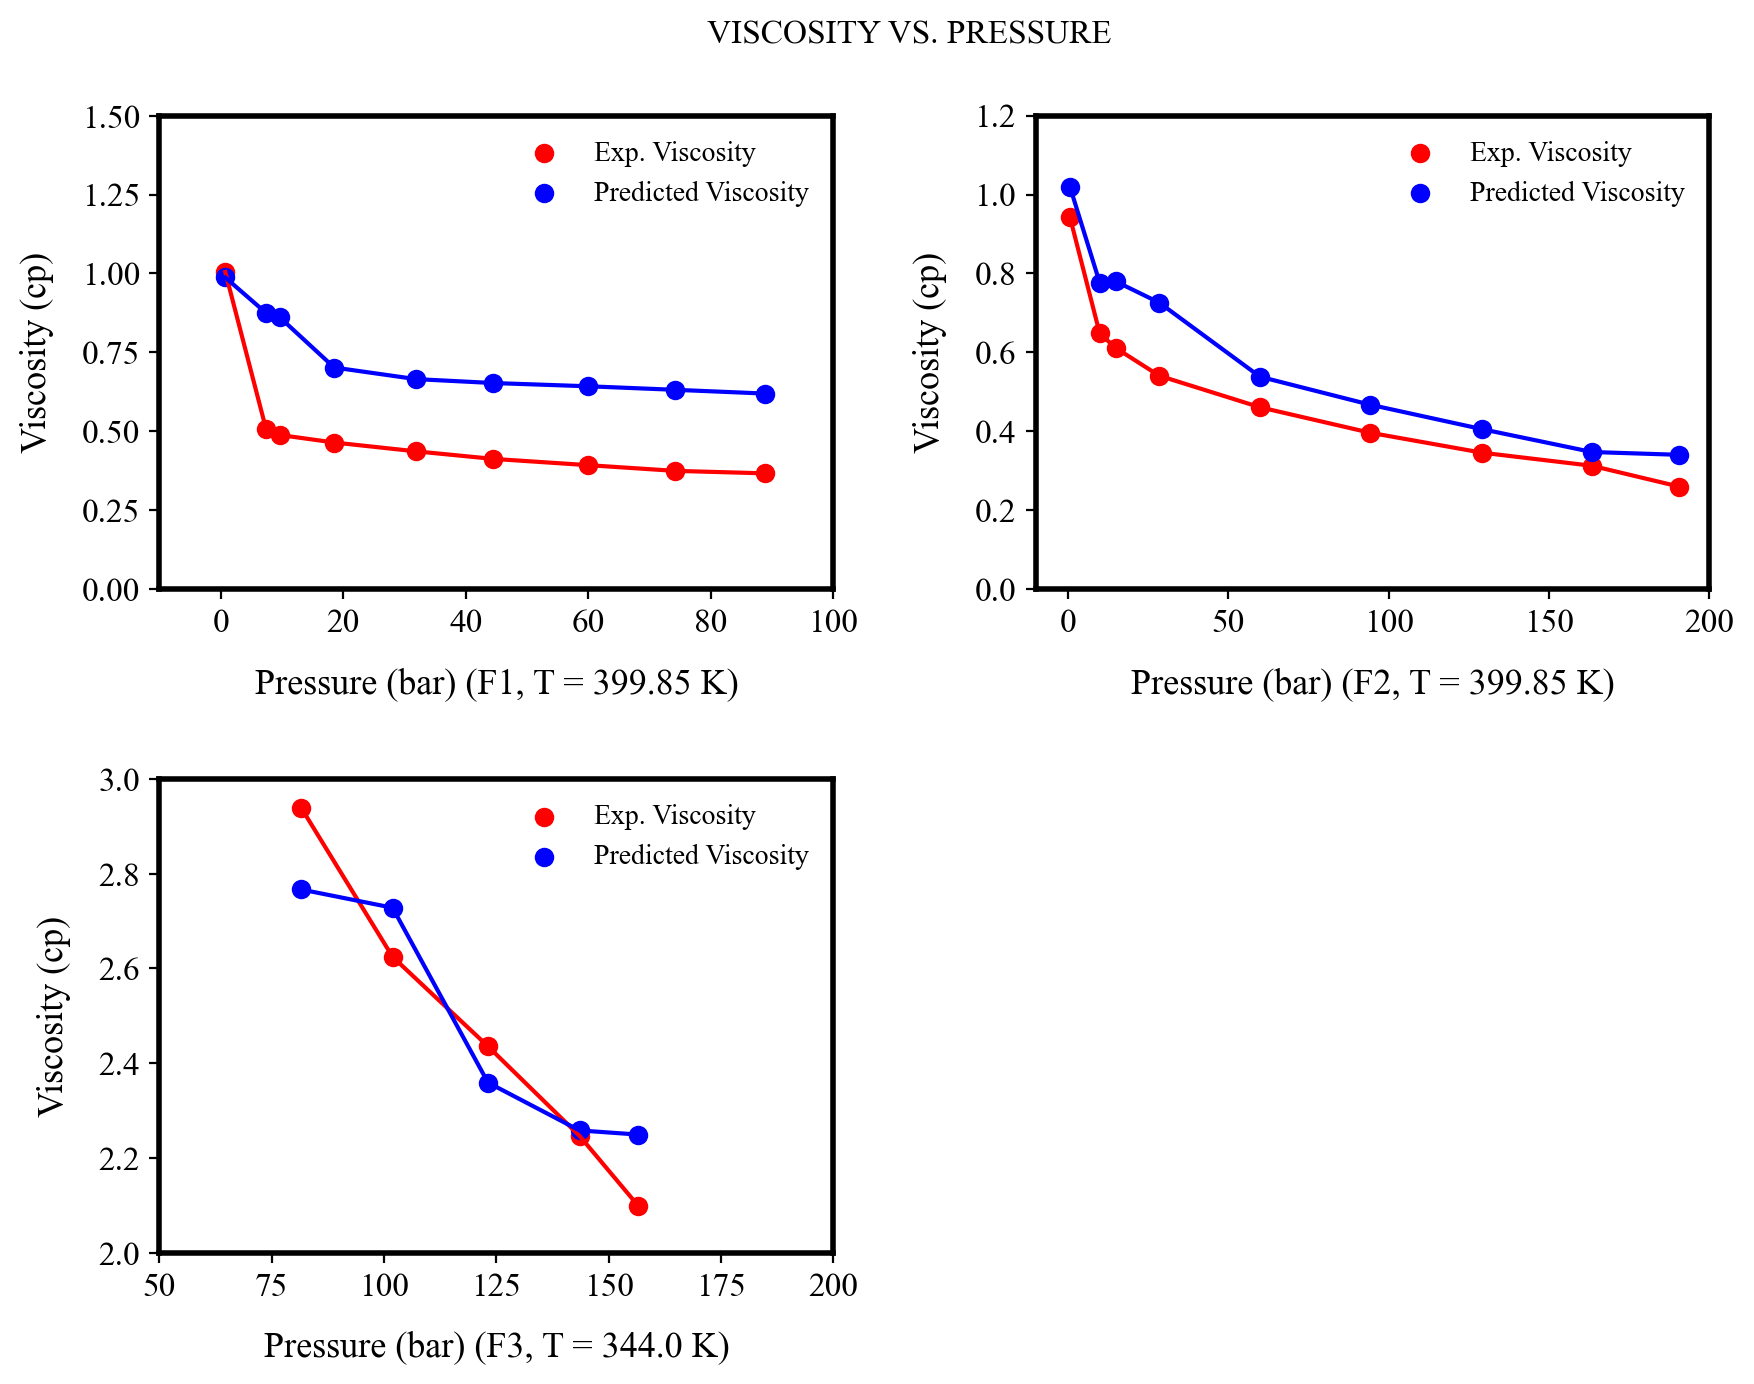

<ipython-input-52-1ce78482fe50>:55: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig2.savefig(figure_path + "rfJubert.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-52-1ce78482fe50>:55: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig2.savefig(figure_path + "rfJubert.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


In [52]:
#Make all rc parameter as default 
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
fig2 = plt.figure(figsize=(10,16) , dpi = 200)
plt.suptitle("VISCOSITY VS. PRESSURE" , fontsize = 12 , c = "black", y=0.91)

for i,j in enumerate(Ref_name_list , 1):
    locals()["ax"+str(i)] = plt.subplot(4,2,i)
    plt.scatter(rf_test_result[rf_test_result["Tag Name"] == j]["P"],rf_test_result[rf_test_result["Tag Name"] == j]["VISCOSITY"],c = "red",label = "Exp. Viscosity")
    plt.plot(rf_test_result[rf_test_result["Tag Name"] == j]["P"],rf_test_result[rf_test_result["Tag Name"] == j]["VISCOSITY"],c = "red")
    plt.scatter(rf_test_result[rf_test_result["Tag Name"] == j]["P"],rf_test_result[rf_test_result["Tag Name"] == j]["Viscosity Predicted"],c = "blue",label = "Predicted Viscosity")
    plt.plot(rf_test_result[rf_test_result["Tag Name"] == j]["P"],rf_test_result[rf_test_result["Tag Name"] == j]["Viscosity Predicted"],c = "blue")
    plt.legend(fontsize = 8)
  
    #plt.ylim((round(min(svr_test_result[svr_test_result["Ref. Name"] == j]["Density Predicted"])-50), round(max(svr_test_result[svr_test_result["Ref. Name"] == j]["Density"])+50)))
    #plt.yticks((min(svr_test_result[svr_test_result["Ref. Name"] == j]["Density Predicted"])-50, max(svr_test_result[svr_test_result["Ref. Name"] == j]["Density"])+50))
    #plt.xlim((min(svr_test_result[svr_test_result["Ref. Name"] == j]["P"])-5, max(svr_test_result[svr_test_result["Ref. Name"] == j]["P"])+5))

    plt.xlabel("Pressure (bar)" + " " + "(F" + str(i)+"," +" " + "T = " + str(rf_test_result[rf_test_result["Tag Name"] == j][["Temp"]].values[0][0]) + " K)", fontsize = 13,labelpad = 10)
    plt.ylabel("Viscosity (cp)",fontsize = 13,labelpad = 10)
    plt.legend(frameon=False )
    
#Changing Border thickness of all subplots
for i in range(1,4,1):
    for axis in ['top', 'bottom', 'left', 'right']:
        locals()["ax"+str(i)].spines[axis].set_linewidth(2)

ax1.set_xlim(-10,100)


ax2.set_xlim(-10,200)
ax3.set_xlim(50,200)






##Set y limit for axis ##

ax1.set_ylim(0,1.5)


ax2.set_ylim(0,1.2)

ax3.set_ylim(2,3)




plt.subplots_adjust(wspace=0.3,hspace = 0.4)  
plt.show()
fig2.savefig(figure_path + "rfJubert.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


## 3. Visulization of Result with XGB

In [44]:
xgb_test_result = test[["P","VISCOSITY","Tag Name","Temp"]]
xgb_test_result["Viscosity Predicted"] = result_xgb_test["Predicted Viscosity (test)"]

<ipython-input-44-2bb04cb1d24f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xgb_test_result["Viscosity Predicted"] = result_xgb_test["Predicted Viscosity (test)"]


In [45]:
Ref_name_list = xgb_test_result["Tag Name"].unique()

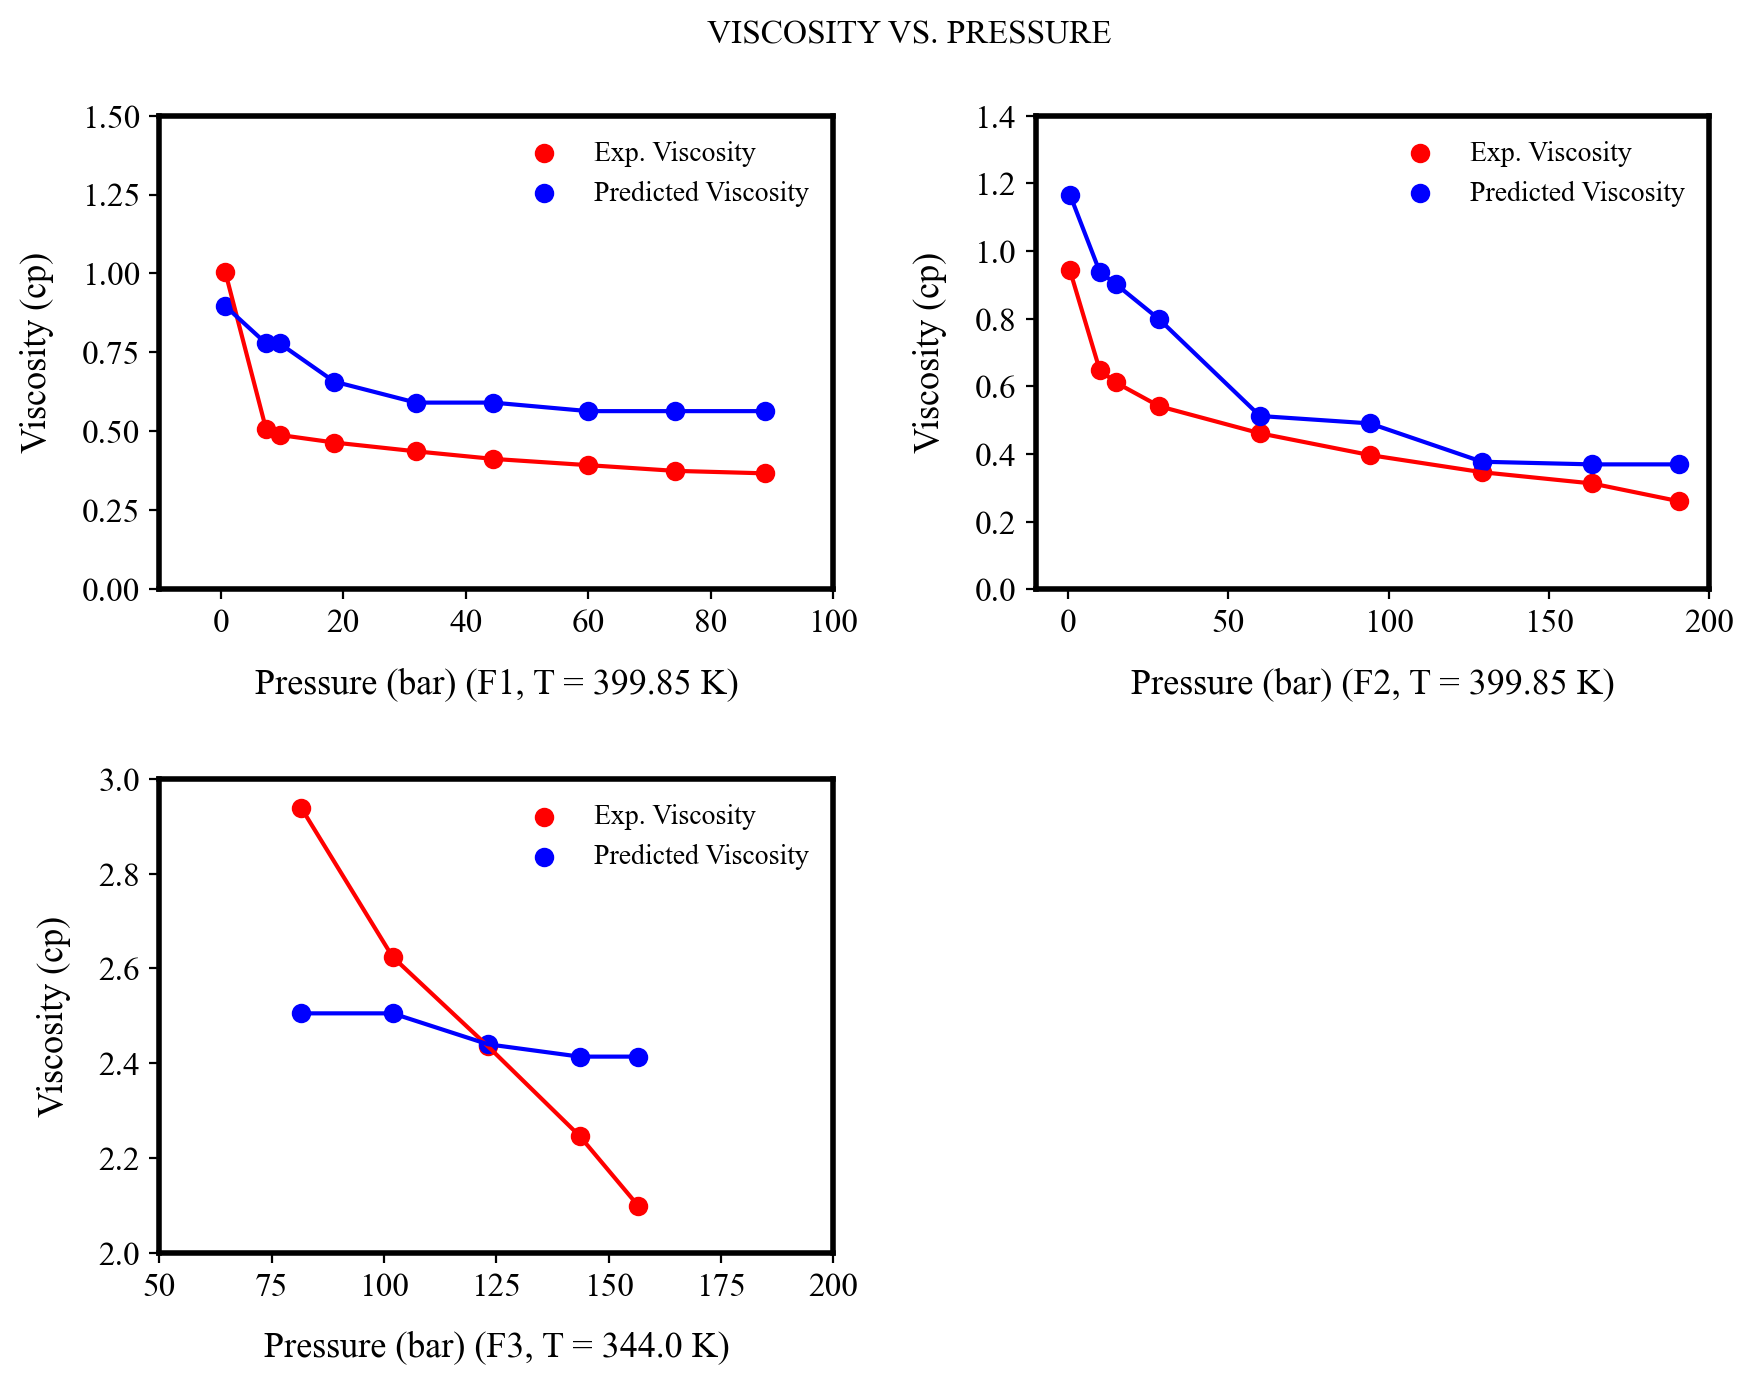

<ipython-input-55-11c8b768a9d9>:56: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig3.savefig(figure_path + "xgbJubert.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
<ipython-input-55-11c8b768a9d9>:56: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  fig3.savefig(figure_path + "xgbJubert.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")


In [55]:
#Make all rc parameter as default 
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["font.family"] = "Times New Roman"
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
fig3 = plt.figure(figsize=(10,16) , dpi = 200)
plt.suptitle("VISCOSITY VS. PRESSURE" , fontsize = 12 , c = "black", y=0.91)

for i,j in enumerate(Ref_name_list , 1):
    locals()["ax"+str(i)] = plt.subplot(4,2,i)
    plt.scatter(xgb_test_result[xgb_test_result["Tag Name"] == j]["P"],xgb_test_result[xgb_test_result["Tag Name"] == j]["VISCOSITY"],c = "red",label = "Exp. Viscosity")
    plt.plot(xgb_test_result[xgb_test_result["Tag Name"] == j]["P"],xgb_test_result[xgb_test_result["Tag Name"] == j]["VISCOSITY"],c = "red")
    plt.scatter(xgb_test_result[xgb_test_result["Tag Name"] == j]["P"],xgb_test_result[xgb_test_result["Tag Name"] == j]["Viscosity Predicted"],c = "blue",label = "Predicted Viscosity")
    plt.plot(xgb_test_result[xgb_test_result["Tag Name"] == j]["P"],xgb_test_result[xgb_test_result["Tag Name"] == j]["Viscosity Predicted"],c = "blue")
    plt.legend(fontsize = 8)
  
    #plt.ylim((round(min(svr_test_result[svr_test_result["Ref. Name"] == j]["Density Predicted"])-50), round(max(svr_test_result[svr_test_result["Ref. Name"] == j]["Density"])+50)))
    #plt.yticks((min(svr_test_result[svr_test_result["Ref. Name"] == j]["Density Predicted"])-50, max(svr_test_result[svr_test_result["Ref. Name"] == j]["Density"])+50))
    #plt.xlim((min(svr_test_result[svr_test_result["Ref. Name"] == j]["P"])-5, max(svr_test_result[svr_test_result["Ref. Name"] == j]["P"])+5))

    plt.xlabel("Pressure (bar)" + " " + "(F" + str(i)+"," +" " + "T = " + str(xgb_test_result[xgb_test_result["Tag Name"] == j][["Temp"]].values[0][0]) + " K)", fontsize = 13,labelpad = 10)
    plt.ylabel("Viscosity (cp)",fontsize = 13,labelpad = 10)
    plt.legend(frameon=False )
    
#Changing Border thickness of all subplots
for i in range(1,4,1):
    for axis in ['top', 'bottom', 'left', 'right']:
        locals()["ax"+str(i)].spines[axis].set_linewidth(2)

ax1.set_xlim(-10,100)


ax2.set_xlim(-10,200)
ax3.set_xlim(50,200)






##Set y limit for axis ##

ax1.set_ylim(0,1.5)


ax2.set_ylim(0,1.4)

ax3.set_ylim(2,3)





plt.subplots_adjust(wspace=0.3,hspace = 0.4)  
plt.show()
fig3.savefig(figure_path + "xgbJubert.jpg" ,quality = 95 , dpi = 300 ,papertype = "letter",bbox_inches = "tight")
